## Linear Regression 

## Supervised Learning
Supervised learning algorithm are trained using labeled examples where the desired output is already known. Supervised learning is used in applications where historic data predicts the future outcomes.

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [17]:
import numpy as np # data analysis 
import pandas as pd # import datafiles
import matplotlib.pyplot as plt # for plotting and data visualization 
import seaborn as sns #data visualization 
%matplotlib inline

In [18]:
# r is used for convering \ to / since pyhton need input in / to read the path
data = pd.read_csv(r'C:\Users\yvams\Desktop\TA spring 2023\USA_Housing.csv')

In [19]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [20]:
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [22]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [23]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

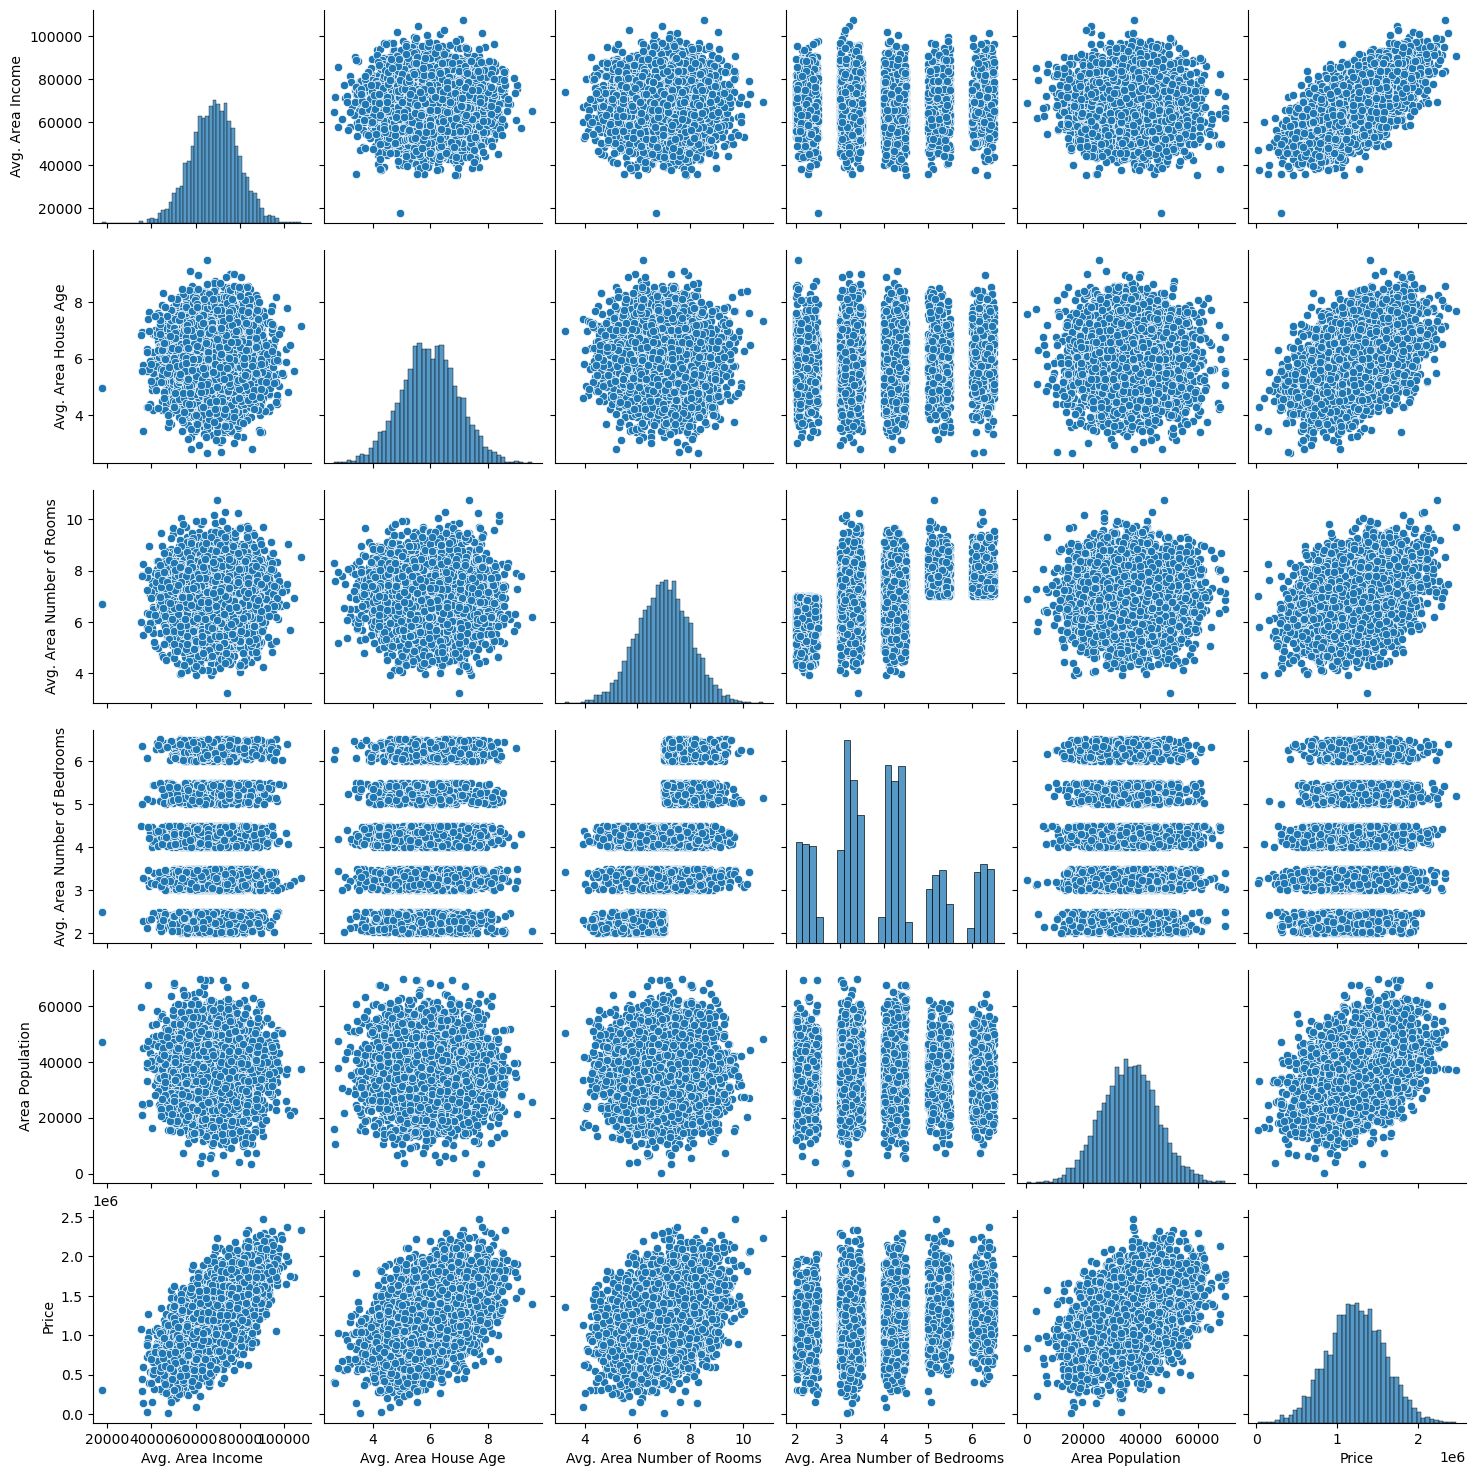

In [14]:
sns.pairplot(data)

#### This plot shows not only the histograms of all columns, but also correlation scatter plots.
#### We can see that pretty much everything is normally distributed except the avg. bedrooms
#### The avg. bedrooms are mostly centered around 2,3,4,5,and 6.

<AxesSubplot:xlabel='Price', ylabel='Count'>

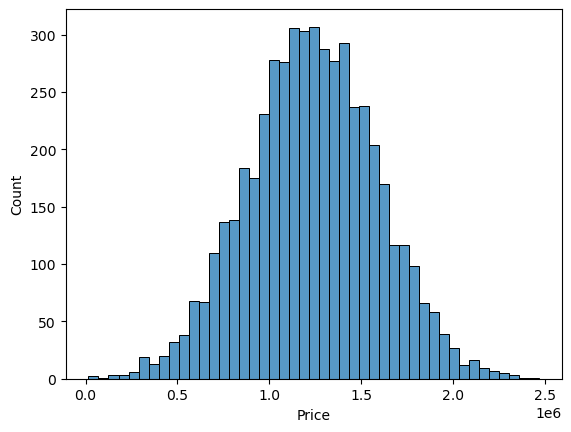

In [25]:
sns.histplot(data['Price'])

In [26]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

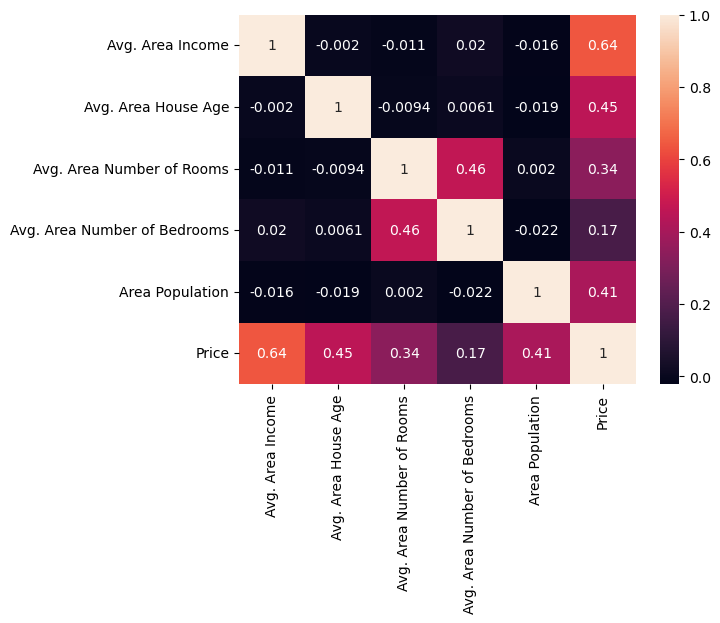

In [29]:
# We will plot the correlation information using a heatmap
sns.heatmap(data.corr(),annot=True)

C:\Users\yvams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

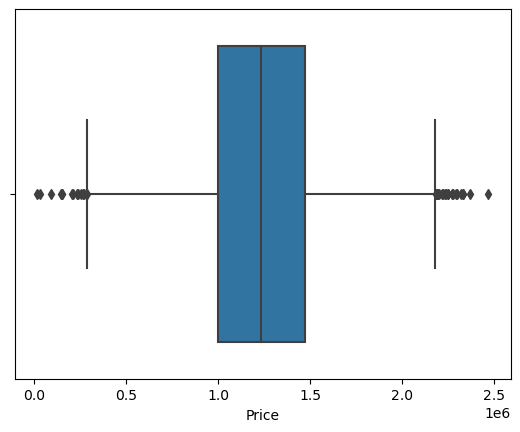

In [30]:
sns.boxplot(data['Price'])

C:\Users\yvams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


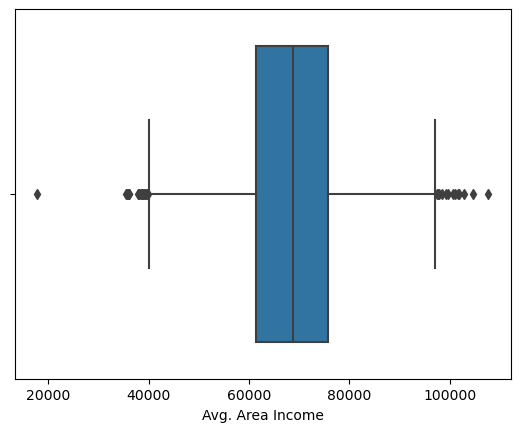

C:\Users\yvams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


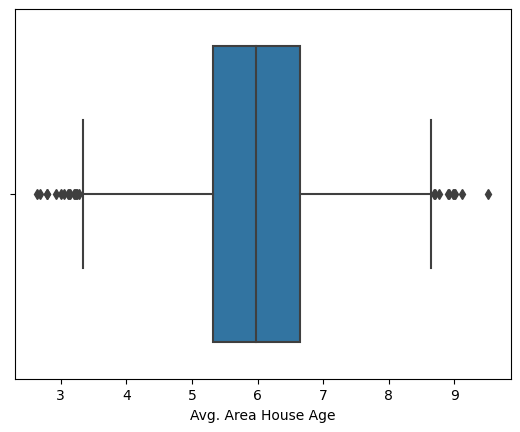

C:\Users\yvams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


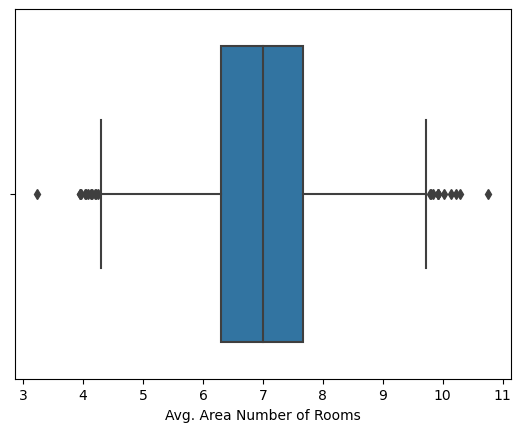

C:\Users\yvams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


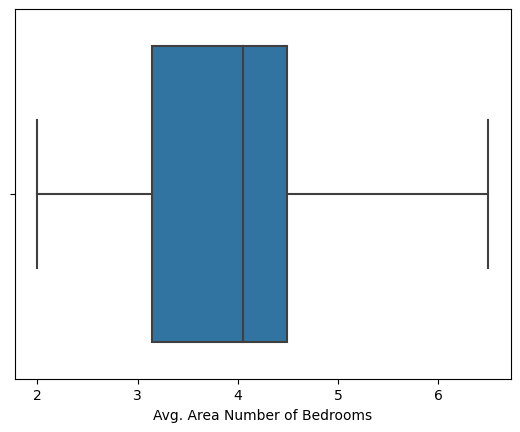

C:\Users\yvams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


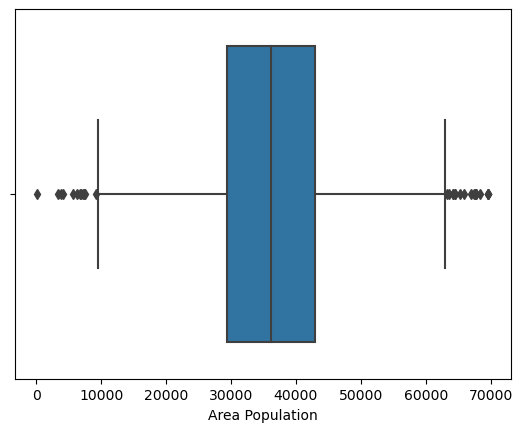

C:\Users\yvams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


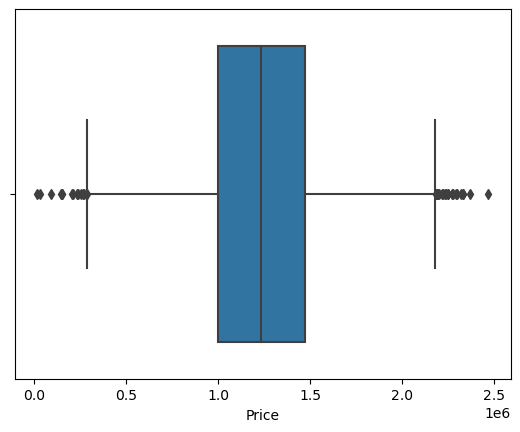

C:\Users\yvams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

In [33]:
# we get error at the end because of the address column which is object datatype
for label in data.columns:
    sns.boxplot(data[label])
    plt.show()

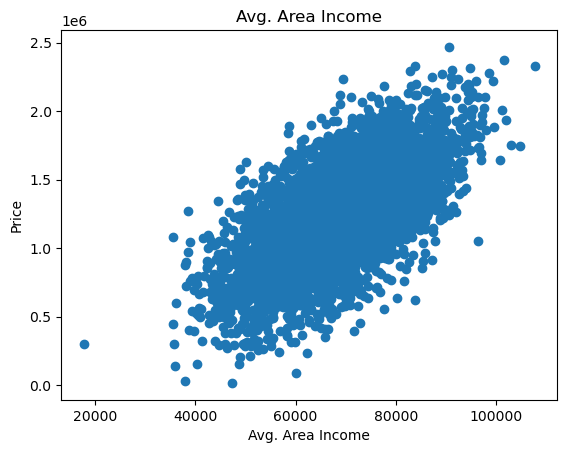

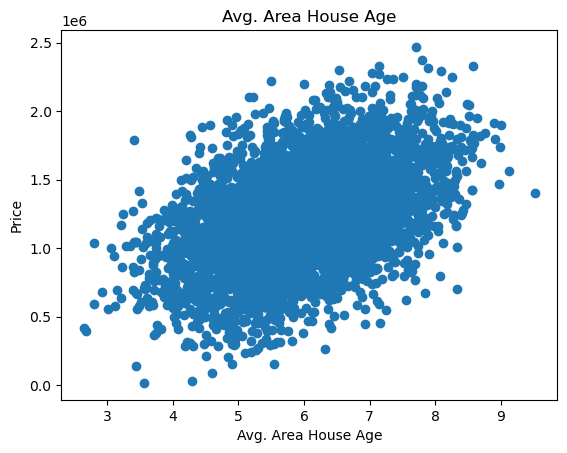

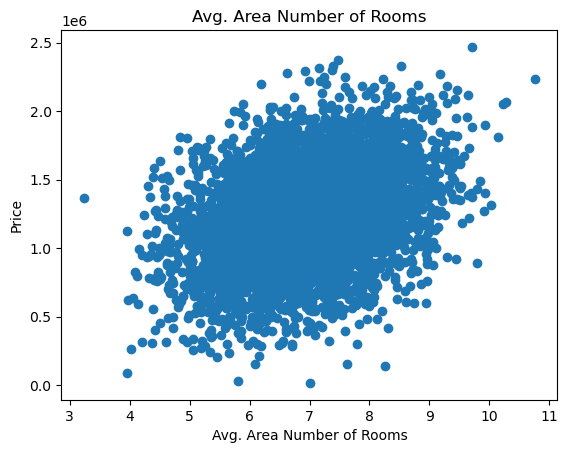

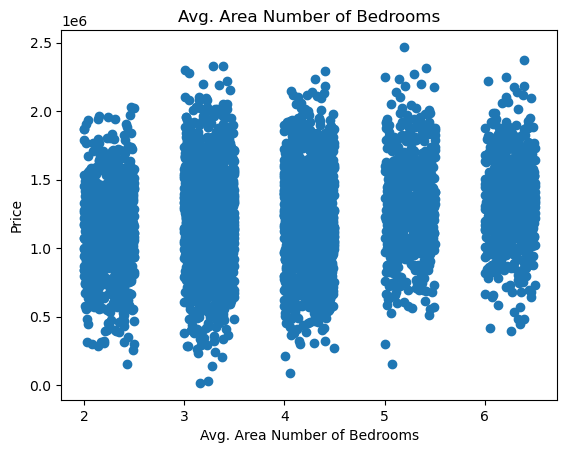

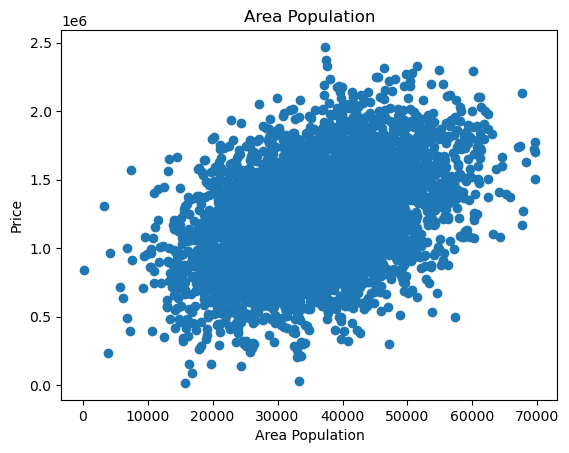

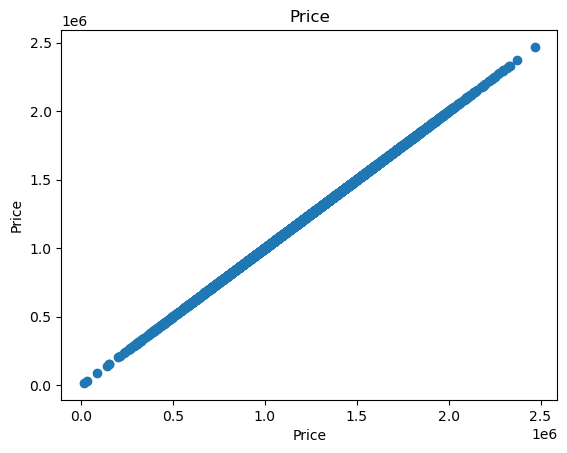

KeyboardInterrupt: 

In [35]:
# we get error at the end because of the address column which is object datatype
for label in data.columns[:]:
    plt.scatter(data[label],data["Price"])
    plt.title(label)
    plt.ylabel("Price")
    plt.xlabel(label)
    plt.show()

## Train test Split

In [37]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### before splitting the data into train test split we need to assign feature variables and target variable to different arrays
#### so we are assigning feature variables to x array and taget variable to y array 

In [40]:
x=data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=data['Price']

In [43]:
x.shape

(5000, 5)

In [44]:
y.shape

(5000,)

## Train Test split 

Test size is the percentage of data that you want to be allocated to the test set.The remaining data becomes the train set

Random state can be any number. It ensures a specific set of random splits on your data because the train test split occurs randomly

In [47]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=121)

In [59]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1496,62714.554434,4.861476,5.340058,3.06,41998.568880
678,65124.656023,4.886834,6.370539,4.10,19161.780904
4751,69886.448824,6.909679,6.031215,2.18,22959.362037
1180,72695.115137,5.363777,6.871980,4.24,48115.420780
2504,60846.618486,4.072355,7.666556,3.16,28172.065283
...,...,...,...,...,...
1639,85441.488869,4.798259,7.127674,6.13,46302.401587
4717,60402.998624,5.443869,7.545897,3.23,47018.150536
1261,74585.839799,4.492904,5.736896,3.30,48051.647652
4667,71254.799565,6.541421,7.575107,5.43,38916.451162


In [61]:
x_test.shape

(1000, 5)

## linear regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm=LinearRegression()

In [65]:
lm.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [66]:
print(lm.intercept_)

-2628102.2985599414


In [67]:
# Each of the coefficients relate to a column in X_train
# Let us create a dataframe of the coefficients
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=['coefficient'])
coeff_df

,coefficient
Avg. Area Income,21.489534
Avg. Area House Age,164718.285079
Avg. Area Number of Rooms,121187.938941
Avg. Area Number of Bedrooms,1680.396057
Area Population,15.166036


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

This probably does not make sense because this is made up data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):


In [68]:
pred=lm.predict(x_test)

In [69]:
pred

array([ 809622.72160701,  645877.52615954, 1094651.65522359,
       1387240.19561905,  711917.27249802,  843470.97954478,
       1304883.92097483, 1218503.08662657,  715317.47846098,
        946090.82823203,  312988.44501988,  786765.61896825,
       1017654.74899938, 1058416.91045355, 1757533.58429606,
       1157762.8825199 , 1732238.52167221, 1881257.60836572,
       1093917.19693328, 1362350.42132043, 1078117.70966579,
       1849554.43701357,  620180.5791594 , 1389848.55397257,
       1948081.22188856,  462600.70807378,  594984.69222074,
       1124498.56793231, 1083524.38535909, 1584242.8729302 ,
       1484874.32948703, 1199494.06705785, 1049060.1255022 ,
       1077321.1956654 , 1397115.01053039, 1403279.25077057,
       1148552.92696072,  914899.64134922,  710512.54969178,
       1384889.82617159, 1104125.79550554, 1111487.67744761,
        915151.02601094, 1304910.62905444, 1693367.52871052,
       1139730.01528035,  789027.47079933,  797054.99096001,
       1391374.54142621,

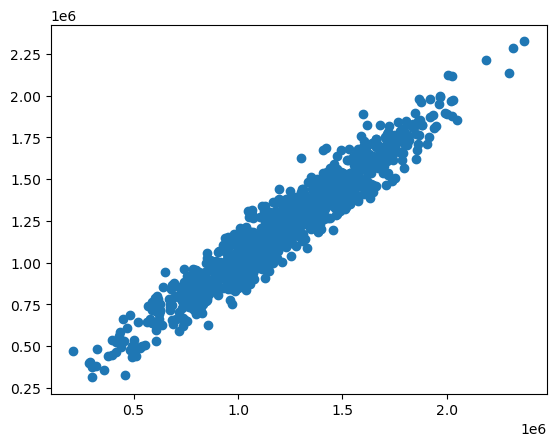

In [82]:
plt.scatter(y_test,pred)

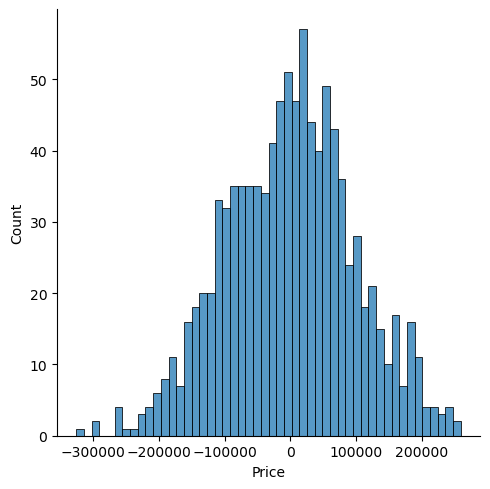

In [84]:
# We can actually check the residuals (actual - predicted values) using a displot
sns.displot((y_test-pred),bins=50);
# Note that only the errors have to be normally distributed and not the data itself.
# If the residuals are normally distributed like this case, 
# we can assume that our model has done a pretty good job with the predictions

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [76]:
from sklearn import metrics

In [78]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 78441.62858338043
MSE: 9657451575.804024
RMSE: 98272.33372523532
